In [1]:
# 1
print('''
1-1 거짓 Bisection 방법은 미분가능하지 않아도 사용할 수 있다.
1-2 거짓 부호가 다른 폐구간에서 해를 찾는방법이다
1-3 거짓 함수의 해가 없다면 해를 찾을 수 없다. 
1-4 참
1-5 거짓 f'까지 구해도 구할수도 있다.
1-6 참
1-7 참
1-8 거짓 초기 시도해가 적절하지 않을경우 그래프의 모양에 따라서 해를 잘 못찾는다.

''')


1-1 거짓 Bisection 방법은 미분가능하지 않아도 사용할 수 있다.
1-2 거짓 부호가 다른 폐구간에서 해를 찾는방법이다
1-3 거짓 함수의 해가 없다면 해를 찾을 수 없다. 
1-4 참
1-5 거짓 f'까지 구해도 구할수도 있다.
1-6 참
1-7 참
1-8 거짓 초기 시도해가 적절하지 않을경우 그래프의 모양에 따라서 해를 잘 못찾는다.




In [9]:
# 2
import matplotlib.pyplot as plt
import math
from numpy import sign
import numpy as np
import time
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams.update({'font.size': 20})

def bisection(f,x1,x2,switch=1,tol=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
#    if sign(f1) == sign(f2):
#        error.err('Root is not bracketed')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None

        if f3 == 0.0: return x3
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0

def newtonRaphson(f,df,a,b,tol=1.0e-9):
    from numpy import sign
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
#    if sign(fa) == sign(fb): error.err("Root is not bracketed")
    x = 0.5*(a + b)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
        if sign(fa) != sign(fx): b = x
        else: a = x
        dfx = df(x)
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
        if (b - x)*(x - a) < 0.0:
            dx = 0.5*(b - a)
            x = a + dx
        if abs(dx) < tol*max(abs(b),1.0): return x
    print("Too many iterations in Newton-Raphson")

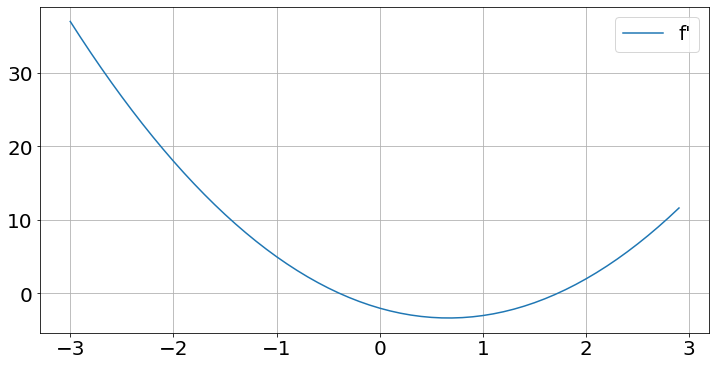

f''은 2/3보다 클때 양수이므로 극솟점은 1, 2 사이에 있는 f'의 해
Bisection : 1.7207589149475098 
Newton : 1.7207592200561288
Bisection time : 0.0001590251922607422 
Newton time : 0.00011730194091796875


In [10]:
# 2-1

# f = lambda x: x**3 - 2*x**2 - 2*x + 1
df = lambda x: 3*x**2 - 2*2*x - 2
ddf = lambda x: 3*2*x - 2*2

xx=  np.arange(-3,3,0.1)
plt.grid()
plt.plot(xx,df(xx),label='f\'')
plt.legend()
plt.show()
print('f\'\'은 2/3보다 클때 양수이므로 극솟점은 1, 2 사이에 있는 f\'의 해')

start = time.time()
x1 = bisection(df,1,2,switch=1,tol=1.0e-6)
end = time.time()
btime = end - start

start = time.time()
x2 = newtonRaphson(df,ddf,1,2,tol=1.0e-6)
end = time.time()
ntime = end-start

print('Bisection :', x1,'\nNewton :', x2)
print('Bisection time :',btime,'\nNewton time :',ntime)

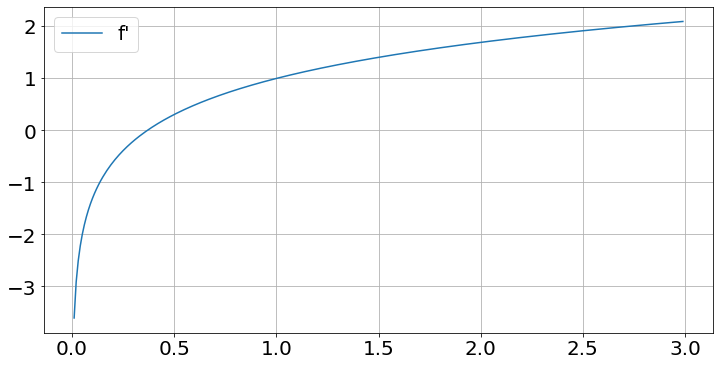

f''은 0보다 클때 양수이므로 극솟점은 0, 1 사이에 있는 f'의 해
Bisection : 0.36787972450256345 
Newton : 0.36787944117144233
Bisection time : 0.0002689361572265625 
Newton time : 0.000148773193359375


In [11]:
# 2-2

# f = lambda x: x*np.log(x)
df = lambda x: np.log(x) + 1
ddf = lambda x: 1/x

xx=  np.arange(0.01,3,0.01)
plt.grid()
plt.plot(xx,df(xx),label='f\'')
plt.legend()
plt.show()
print('f\'\'은 0보다 클때 양수이므로 극솟점은 0, 1 사이에 있는 f\'의 해')


start = time.time()
x1 = bisection(df,0.1,1,switch=1,tol=1.0e-6)
end = time.time()
btime = end - start

start = time.time()
x2 = newtonRaphson(df,ddf,0.1,1,tol=1.0e-6)
end = time.time()
ntime = end-start

print('Bisection :', x1,'\nNewton :', x2)
print('Bisection time :',btime,'\nNewton time :',ntime)

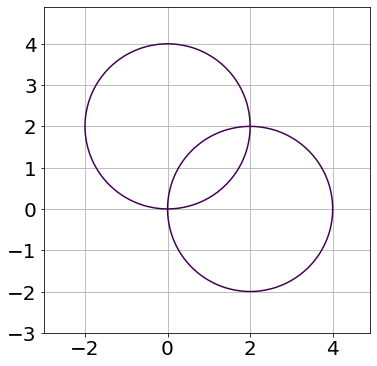

root1 : [0. 0.] 
root2 : [2. 2.]


In [12]:
# 3
import numpy as np
import matplotlib.pyplot as plt

lim = 4.0
delta = 0.1
xdata = np.arange(-3,5,delta)
ydata= np.arange(-3,5,delta)
X, Y = np.meshgrid(xdata,ydata)


def f1(x,y):
    return (x-2)**2.0 + y**2.0 - 4

def f2(x,y):
    return x**2.0 + (y-2)**2.0 - 4

F1 = f1(X,Y)
F2 = f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.contour(X,Y,F1,[0])
plt.contour(X,Y,F2,[0])
plt.grid()
plt.show()

from scipy.optimize import root

def f(x):
    f1 = x[0]**2.0 + x[1]**2.0 - 3.0
    f2 = x[0]*x[1] - 1.0
    return [f1,f2]

def fun(x):
    return [f1(x[0],x[1]), f2(x[0],x[1])]


r1 = root(fun,[0,0]).x
r2 = root(fun,[2,2]).x
print('root1 :',r1,'\nroot2 :',r2)

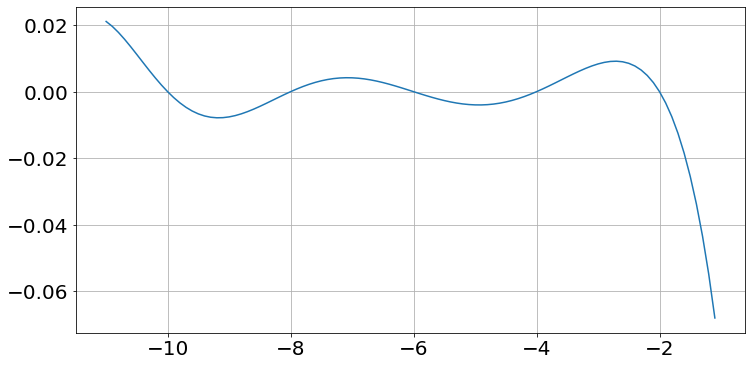

roots : -10.0 -8.0 -6.0 -4.0 -2.0


In [13]:
# 4-1
from scipy.special import zeta
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(-11,-1,0.1)
plt.plot(xx,zeta(xx))
plt.grid()
plt.show()
x1 = root_scalar(zeta,bracket=[-11,-9]).root
x2 = root_scalar(zeta,bracket=[-9,-7]).root
x3 = root_scalar(zeta,bracket=[-7,-5]).root
x4 = root_scalar(zeta,bracket=[-5,-3],xtol=1e-15).root
x5 = root_scalar(zeta,bracket=[-3,-1],xtol=1e-15).root
print('roots :',x1,x2,x3,x4,x5)

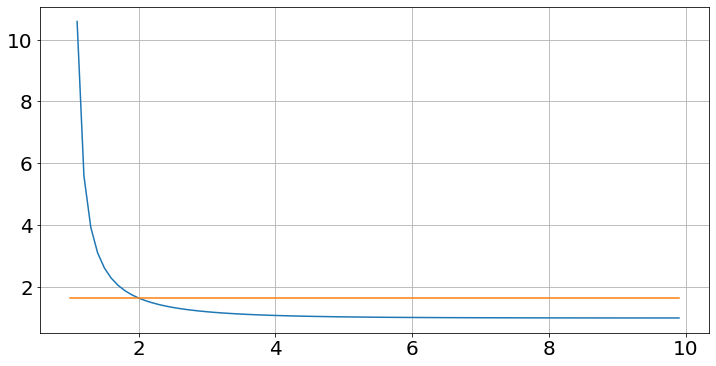

zeta(x) = pi**2/6 root : 2.0000000000000004


In [14]:
# 4-2
from scipy.special import zeta
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
import numpy as np

xx = np.arange(1,10,0.1)
plt.plot(xx,zeta(xx))
plt.plot(xx,np.pi**2/6*np.ones(len(xx)))
plt.grid()
plt.show()

def zetaf(x):
    return zeta(x) - np.pi**2/6
x = root_scalar(zetaf,bracket=[1,3],xtol=1e-16).root
print('zeta(x) = pi**2/6 root :',x)